# Assignment 4 DFA

## Reading

### Investment philosophy.
In 100 words or less, describe DFA’s belief about how to find premium in the market.

To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?

Are DFA’s funds active or passive?

What do DFA and others mean by a “value” stock? And a “growth” stock?



DFA seeks premiums by tilting toward small-cap and high book-to-market (“value”) stocks identified by robust academic research (Fama-French). They assume markets are broadly efficient, so they don’t do fundamental stock picking; value comes from systematic tilts and superior, low-cost trading (e.g., block trades) rather than forecasting. Minimal reliance on macro calls. Their funds are best described as passive/index-like with purposeful tilts (“rules-based active” in exposures, passive in security selection). “Value” = high book-to-market; “growth” = low book-to-market.

### Challenges for DFA’s view.

What challenge did DFA’s model see in the 1980’s?

And in the 1990’s?



1980s: The size effect stalled—small caps lagged large caps for years, raising “has the anomaly died?” criticism.

1990s: Growth (especially mega-cap tech) crushed value; DFA’s value tilt looked out of step until the 2000–01 reversal.

### The market.
Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered ``large cap”? What percent of the market value do they account for?

Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S. equity market in 1926-2001, including every subsample except 1963-1981. So why should an investor be interested in this value factor?



1. “Large cap” count: 207 firms.

    Share of total market value: 70%.

2. HML isn’t meant to replace the market; it’s a compensated risk/style factor that adds an independent source of return. It’s (i) well-supported across long U.S. histories and internationally, (ii) offers diversification versus the market (periods of powerful payoffs like 2000–01), and (iii) improves portfolio efficiency when combined with the market (higher expected return per unit of total portfolio risk). In short: lower standalone mean than the market is fine—its job is to enhance a total portfolio, not beat the market by itself.

In [102]:
import openpyxl
workbook = openpyxl.load_workbook("dfa_analysis_data.xlsx")
sheet_names = workbook.sheetnames
print(sheet_names)

['descriptions', 'factors', 'portfolios (total returns)']


## Part 2

### 2.1

In [153]:
import pandas as pd
import datetime
import helper
import  numpy as np
# clean
data = pd.read_excel("dfa_analysis_data.xlsx",sheet_name="factors")
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date").sort_index()


s1 = data.loc[:'1980-12-31']
s2 = data.loc['1981-01-01':'2001-12-31']
s3 = data.loc['2002-01-01':]
data

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031
...,...,...,...,...
2025-04-30,-0.0084,-0.0059,-0.0340,0.0035
2025-05-31,0.0606,0.0070,-0.0288,0.0038
2025-06-30,0.0486,0.0083,-0.0160,0.0034


In [33]:
# Beginning - 1980
period1 = helper.uni_stats(s1)
period2 = helper.uni_stats(s2)
period3 = helper.uni_stats(s3)

df = pd.concat({"Beginning-1980": period1, "1981-2001": period2, "2002-End": period3},axis=0)
df

mean  volatility  Sharpe (rf=0)  \
Beginning-1980 Mkt-RF  0.006746    0.059175       0.114009   
               SMB     0.002826    0.032989       0.085670   
               HML     0.004193    0.038748       0.108222   
               RF      0.002311    0.002215       1.043281   
1981-2001      Mkt-RF  0.006488    0.045375       0.142980   
               SMB    -0.000168    0.033850      -0.004959   
               HML     0.005380    0.031715       0.169629   
               RF      0.005257    0.002238       2.349019   
2002-End       Mkt-RF  0.007609    0.044320       0.171678   
               SMB     0.000661    0.025533       0.025885   
               HML     0.000100    0.030727       0.003266   
               RF      0.001320    0.001505       0.877021   

                       VaR_0.05 (return quantile)  
Beginning-1980 Mkt-RF                   -0.084090  
               SMB                      -0.041875  
               HML                      -0.044245  
               RF                        0.000000  
1981-2001      Mkt-RF                   -0.064135  
               SMB                      -0.045880  
               HML                      -0.041640  
               RF                        0.002455  
2002-End       Mkt-RF                   -0.077265  
               SMB                      -0.039195  
               HML                      -0.041485  
               RF                        0.000000

### 2.2

Based on the factor statistics above, answer the following.

- Does each factor have a premium (positive expected excess return) in each subsample?

    only in the period from beginning to 1980, factors have a premium. In 1981-2001, the HML factor has a premium.



- Does the premium to the size factor get smaller after 1980?

    the premiums are: 0.002826(Beginning-1980), -0.000168(1981-2001),0.000661(2002-End)

    Thus, it is getting smaller

In [47]:
df_SMB = pd.concat({"Beginning-1980": period1.loc["SMB"], "1981-2001": period2.loc["SMB"], "2002-End": period3.loc["SMB"]},axis=0)
df_SMB

Beginning-1980  mean                          0.002826
                volatility                    0.032989
                Sharpe (rf=0)                 0.085670
                VaR_0.05 (return quantile)   -0.041875
1981-2001       mean                         -0.000168
                volatility                    0.033850
                Sharpe (rf=0)                -0.004959
                VaR_0.05 (return quantile)   -0.045880
2002-End        mean                          0.000661
                volatility                    0.025533
                Sharpe (rf=0)                 0.025885
                VaR_0.05 (return quantile)   -0.039195
Name: SMB, dtype: float64


- Does the premium to the value factor get smaller during the 1990’s?

    from plotting, we can see it is not getting smaller

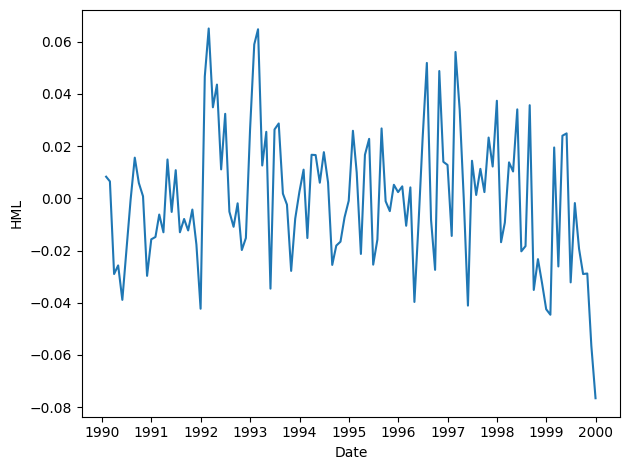

In [57]:
ninety = data.loc['1990-01-01':'1999-12-31']
helper.plot_value_over_time(ninety,"HML")


- How have the factors performed since the time of the case, (2002-present)?

    we can see the variance of Mkt-Rf is higher

In [78]:
period3

,mean,volatility,Sharpe (rf=0),VaR_0.05 (return quantile)
Mkt-RF,0.007609,0.044320,0.171678,-0.077265
SMB,0.000661,0.025533,0.025885,-0.039195
HML,0.000100,0.030727,0.003266,-0.041485
RF,0.001320,0.001505,0.877021,0.000000


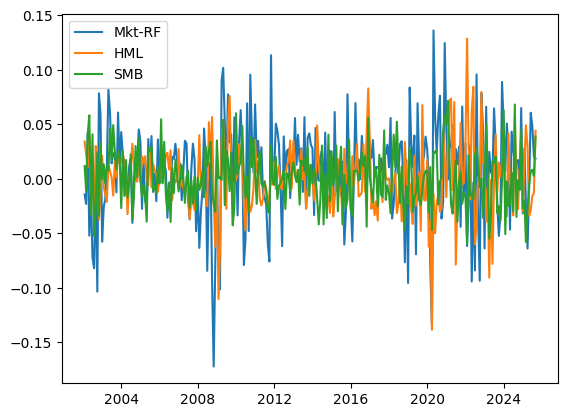

In [95]:
plt.plot(s3.index, s3["Mkt-RF"], label = "Mkt-RF")
plt.plot(s3.index, s3["HML"], label = "HML")
plt.plot(s3.index,  s3["SMB"], label = "SMB")
plt.legend()
plt.show()

### 2.3

The factors are constructed in such a way as to reduce correlation between them.

- Report the correlation matrix across the three factors.

- Does the construction method succeed in keeping correlations small?

- Does it achieve this in each subsample?



Basically, all factors have relatively low correlatiob(absolute value is no more than 0.5), no matter for thr whole period or each subsample

The highest correlation (32.04%) is between SMB and Mkt-RF
The lowest correlation (-6.41%) is between Mkt-RF and RF


<Axes: >

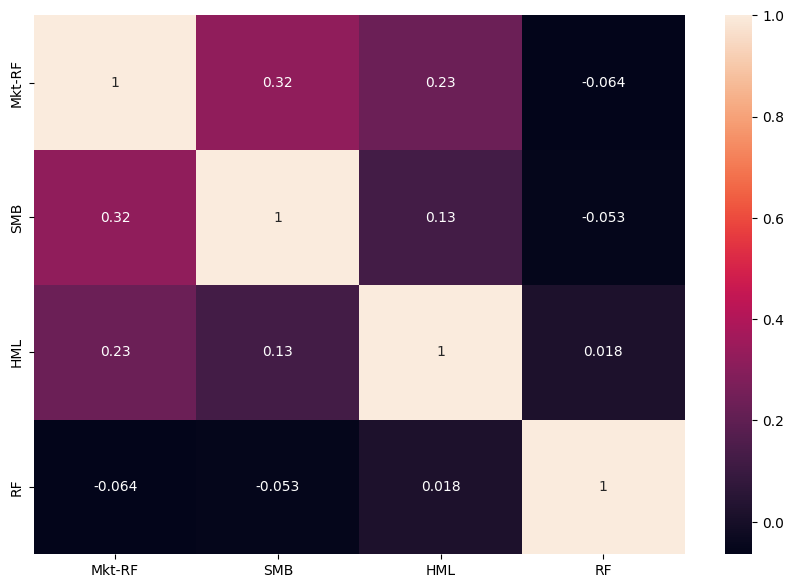

In [88]:


# whole period
helper.calc_correlations(data)

The highest correlation (44.23%) is between HML and Mkt-RF
The lowest correlation (-7.04%) is between Mkt-RF and RF


<Axes: >

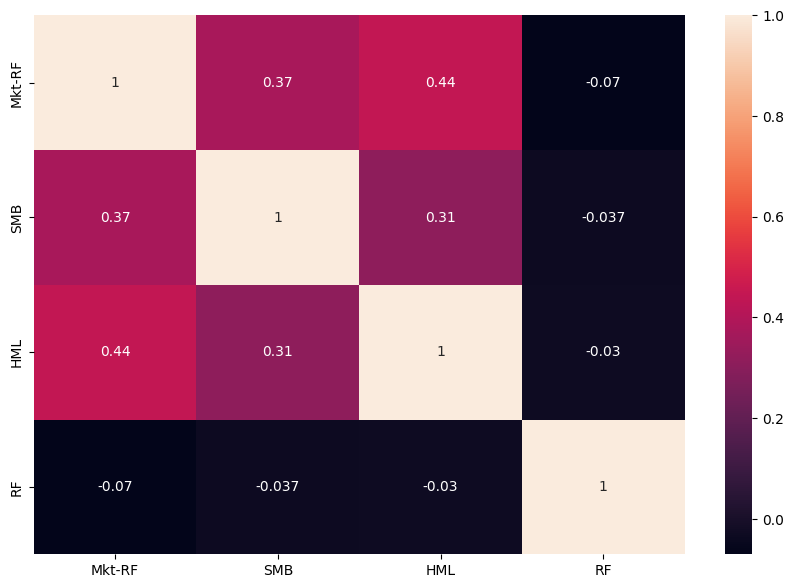

In [89]:
helper.calc_correlations(s1)

The highest correlation (15.87%) is between SMB and Mkt-RF
The lowest correlation (-52.99%) is between Mkt-RF and HML


<Axes: >

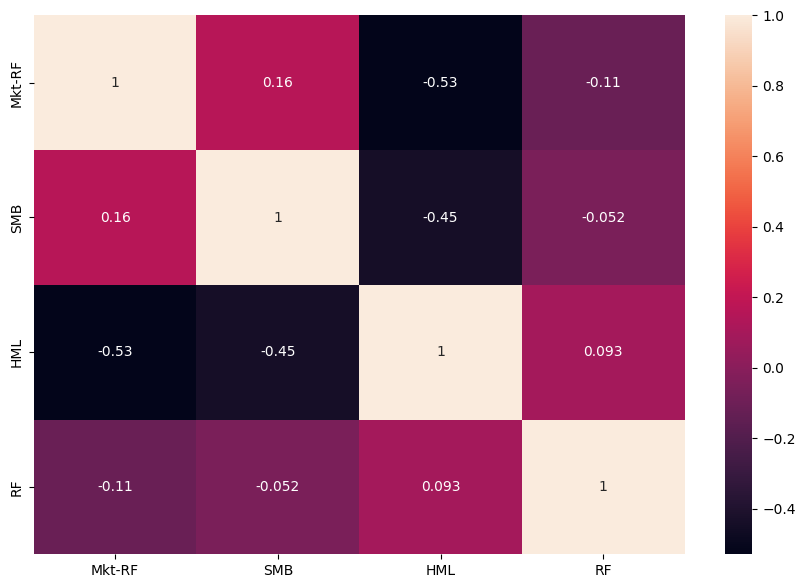

In [90]:
helper.calc_correlations(s2)

The highest correlation (31.60%) is between SMB and Mkt-RF
The lowest correlation (-10.48%) is between SMB and RF


<Axes: >

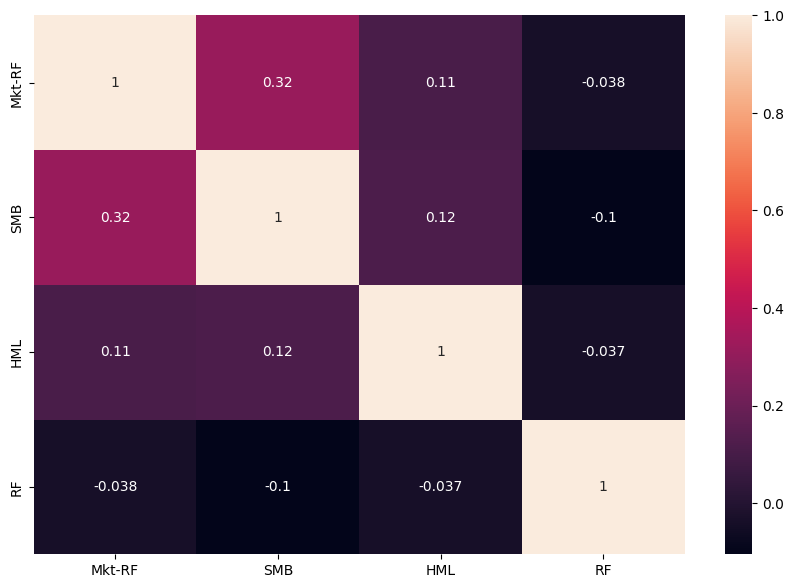

In [91]:
helper.calc_correlations(s3)

### 2.4

Plot the cumulative returns of the three factors.

Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

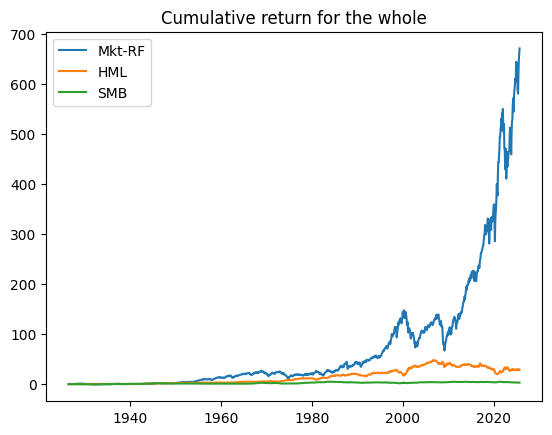

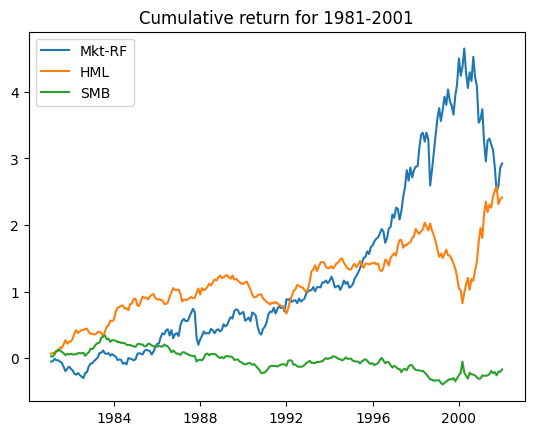

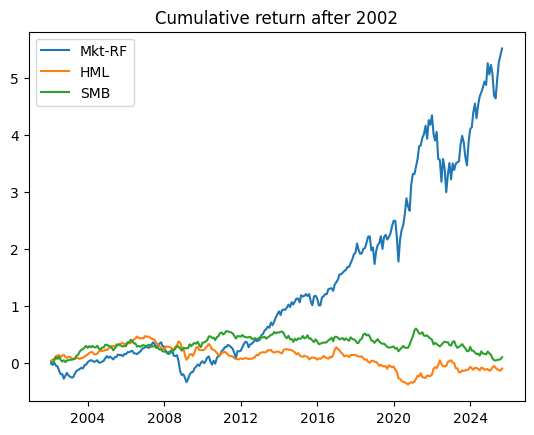

In [101]:
importlib.reload(helper)

cum_ret_full = helper.cumrets(data)
cum_ret_1981_2001 = helper.cumrets(s2)
cum_ret_after2002 = helper.cumrets(s3)

helper.plotting_multiPeriod_overTime(cum_ret_full,"Cumulative return for the whole")
helper.plotting_multiPeriod_overTime(cum_ret_1981_2001,"Cumulative return for 1981-2001")
helper.plotting_multiPeriod_overTime(cum_ret_after2002,"Cumulative return after 2002")

### 2.5

Does it appear that all three factors were valuable in 1981-2001?

And post-2001?

Would you advise DFA to continue emphasizing all three factors?



In 1981-2001,Mkt-Rf and HML can be valuable since they have a spread such that we can long Mkt-RF factor, while shorting teh HML factors
On the other hand, in post 2001, we might only care Mkt-Rf, since the cumulative return is higher.
it might be possible to short SMB since it is decreasing

## Part 3

## 3.1

In [152]:
# clean
data_25 = pd.read_excel("dfa_analysis_data.xlsx",sheet_name=sheet_names[-1])
data_25["Date"] = pd.to_datetime(data_25["Date"])
data_25 = data_25.set_index("Date").sort_index()

#filter
data_25 = data_25.loc["1981-01-01":]

# excess
data_after1981_rf = data.loc["1981-01-01":]["RF"]
dataExcess25 = data_25.sub(data_after1981_rf,axis = 0)
dataExcess25.head(5)


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.054249,-0.013893,0.003712,0.006392,0.022152,-0.057863,-0.017854,-0.010116,0.007936,0.020617,...,-0.078660,-0.044915,-0.014171,-0.004889,0.003898,-0.071780,-0.083514,-0.074557,-0.011083,0.012364
1981-02-28,-0.044800,-0.022740,0.001825,0.009678,0.012478,-0.014160,0.007415,0.014910,0.022227,0.027980,...,0.003117,0.013442,0.034223,0.005988,0.027489,0.022119,0.010130,-0.017048,0.020439,-0.015209
1981-03-31,0.061564,0.091321,0.075505,0.077941,0.060382,0.068694,0.071087,0.064654,0.063975,0.063450,...,0.077407,0.055098,0.072485,0.070515,0.065187,0.020684,0.024396,-0.007959,0.021918,0.069881
1981-04-30,0.017071,0.034543,0.024593,0.035687,0.043325,0.005458,0.025003,0.024547,0.026161,0.029433,...,-0.010456,-0.019226,-0.004609,-0.013228,0.006240,-0.041250,-0.058614,-0.037359,0.010897,-0.040524
1981-05-31,0.038553,0.040581,0.028879,0.014047,0.015229,0.050260,0.007237,0.020115,-0.009282,0.013713,...,0.022358,0.009110,0.008332,-0.003318,0.022151,0.004415,-0.033439,-0.030854,0.025971,-0.003960


Here, to annualize the VaR, we use parametric VaR to pproximate (this is from TA midterm review)
$$
VaR(\alpha) = \mu + \sigma \Phi^{-1}(\alpha)
$$

In [162]:
# annualized stats
equity_stats = helper.annualized_stats(dataExcess25,frq = 12)
equity_stats 

,mean,volatility,Sharpe (rf=0),VaR_0.05 (return quantile)
SMALL LoBM,0.011705,0.271737,0.043075,-0.435262
ME1 BM2,0.088438,0.235431,0.375641,-0.298812
ME1 BM3,0.090226,0.200834,0.449260,-0.240115
ME1 BM4,0.112535,0.194031,0.579986,-0.206618
SMALL HiBM,0.127314,0.208354,0.611049,-0.215397
ME2 BM1,0.060922,0.244669,0.248999,-0.341522
ME2 BM2,0.098365,0.205371,0.478962,-0.239440
ME2 BM3,0.105155,0.186431,0.564042,-0.201496
ME2 BM4,0.108069,0.181868,0.594217,-0.191077
ME2 BM5,0.113192,0.213654,0.529793,-0.238237


### 3.2

In [176]:
import statsmodels.api as sm
data_after1981_Mkt = data.loc["1981-01-01":] #y
x_list = equity_stats.index.tolist() # x albel

X = sm.add_constant(data_after1981_Mkt.loc[dataExcess25.index])  # align dates, add intercept
rows = []
betas, means = [], []
for col in dataExcess25.columns:
    y = dataExcess25[col].dropna()
    xy = X.loc[y.index]
    res = sm.OLS(y, xy).fit()
    alpha, beta = res.params["const"], res.params["Mkt-RF"]
    treynor = y.mean() / beta
    ir = alpha / res.resid.std(ddof=1) 
    
    rows.append((col, alpha, beta, treynor, ir))
    betas.append(beta); means.append(y.mean())

out = pd.DataFrame(rows, columns=["portfolio","alpha","beta","Treynor","IR"]).set_index("portfolio")
MAE_alpha = out["alpha"].abs().mean()


print("MAE(|alpha|) =", MAE_alpha)
out

MAE(|alpha|) = 0.001320381817924626


,alpha,beta,Treynor,IR
portfolio,,,,
SMALL LoBM,-0.005253,1.113364,0.000876,-0.197713
ME1 BM2,-0.000781,0.964014,0.007645,-0.038083
ME1 BM3,-0.000995,0.928240,0.008100,-0.068306
ME1 BM4,0.001437,0.881821,0.010635,0.105517
SMALL HiBM,0.004382,0.928580,0.011426,0.209179
ME2 BM1,-0.001454,1.129351,0.004495,-0.083343
ME2 BM2,0.000155,1.014261,0.008082,0.010730
ME2 BM3,0.000420,0.980167,0.008940,0.027671
ME2 BM4,-0.000283,0.942725,0.009553,-0.022064


### Cross-sectional Estimation

In [180]:
cs = pd.DataFrame({"beta": betas, "mean_excess": means}, index=dataExcess25.columns)

res = sm.OLS(cs["mean_excess"], sm.add_constant(cs["beta"])).fit()

print(res.params.rename({"const":"eta","beta":"lambda_mkt"}))
print("\nR2:  ", res.rsquared)

eta           0.016118
lambda_mkt   -0.008142
dtype: float64

R2:   0.09576702477362087


### 3.4